In [2]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/getdatachimp/demo/main/prep/borked_iris.csv')
df

,Unnamed: 0,sepal_length,sepal_width,petal_length,petal_width,variety,collector
0,0,5.1,3.5,1.4,0.2,Setosa,Sam
1,1,4.9,3.0,1.4,0.2,Setosa,Sam
2,2,4.7,3.2,1.3,0.2,Setosa,Sam
3,3,4.6,3.1,1.5,0.2,Setosa,Sam
4,4,5.0,3.6,1.4,0.2,Setosa,Sam
...,...,...,...,...,...,...,...
145,145,6.7,3.0,5.2,2.3,Virginica,Sam
146,146,6.3,2.5,5.0,1.9,Virginica,Sam
147,147,6.5,3.0,5.2,2.0,Virginica,Sam
148,148,6.2,3.4,5.4,2.3,Virginica,Sam


In [ ]:
X = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y = df['variety'].map({'Setosa': 0, 'Versicolor': 1, 'Virginica': 2})
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [3]:
pipeline = make_pipeline(
  StandardScaler(),
  LogisticRegression()
)

model = pipeline.fit(X_train, y_train)

In [4]:
model.score(X_test, y_test)

0.7368421052631579

In [5]:
from doubtlab.ensemble import DoubtEnsemble
from doubtlab.reason import ProbaReason, WrongPredictionReason
reasons = {
    'proba': ProbaReason(model=model),
    'wrong_pred': WrongPredictionReason(model=model)
}

# Pass these reasons to a doubtlab instance.
doubt = DoubtEnsemble(**reasons)

# Get the ordered indices of examples worth checking again
indices = doubt.get_indices(X_train, y_train)
# Get dataframe with "reason"-ing behind the sorting
predicates = doubt.get_predicates(X_train, y_train)

In [6]:
df = df.join(predicates).drop(['Unnamed: 0'], axis=1)
df.iloc[predicates.index].head(len(indices))

,sepal_length,sepal_width,petal_length,petal_width,variety,collector,predicate_proba,predicate_wrong_pred
99,5.7,2.8,4.1,1.3,Versicolor,Eric,1.0,1.0
55,5.7,2.8,4.5,1.3,Versicolor,Eric,1.0,1.0
92,5.8,2.6,4.0,1.2,Versicolor,Eric,1.0,1.0
41,4.5,2.3,1.3,0.3,Setosa,Sam,1.0,1.0
96,5.7,2.9,4.2,1.3,Versicolor,Eric,1.0,1.0
68,6.2,2.2,4.5,1.5,Versicolor,Eric,1.0,1.0
64,5.6,2.9,3.6,1.3,Versicolor,Eric,1.0,1.0
61,5.9,3.0,4.2,1.5,Versicolor,Eric,0.0,1.0
106,4.9,2.5,4.5,1.7,Virginica,Sam,0.0,1.0
87,6.3,2.3,4.4,1.3,Versicolor,Eric,0.0,1.0


Eric is always associated with doubtly doubtful predictions. What's up with that? Pairplot colored by collector could be helpful here.

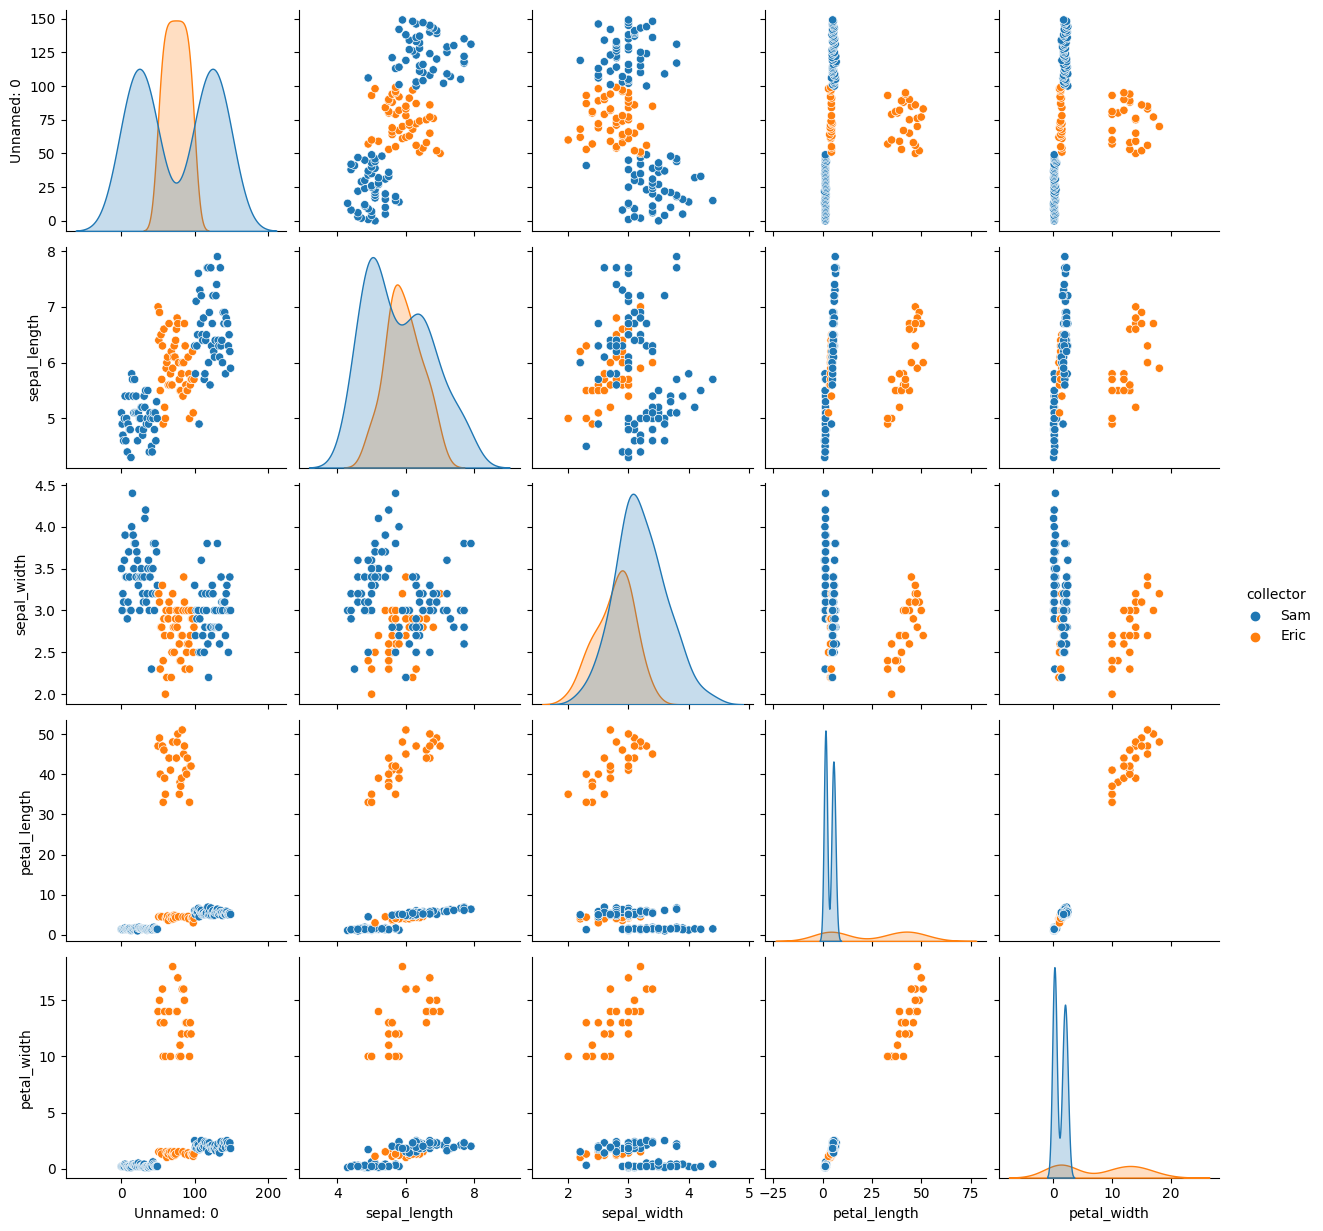

In [5]:
import seaborn as sns
sns.pairplot(data=df, hue='collector')